In [1]:
import pandas as pd

In [2]:
binary_hydride = pd.read_csv('./new-二元氢化物.csv', sep=',')
binary_hydride.sort_values(by=['Tc(K)', '压力(GPa)'], ascending=True, inplace=True)
binary_hydride.drop(labels=[4,8,14], inplace=True)
binary_hydride.drop_duplicates(subset=['化合物', 'theoryorexp'], keep='last', inplace=True)
# 第二行代码是删除 binary_hydride DataFrame 中 化合物 和 theoryorexp 两列的重复值，只保留最后一个重复值，
#   inplace=True 同样表示直接在原 DataFrame 上进行修改。
#   subset 参数用于指定哪些列需要检查重复值，
#   keep 参数用于指定哪一个重复值需要保留。
binary_hydride.shape

(32, 8)

被drop()函数删掉的结构

4:CaH6
8:YH6
14:ThH10

In [3]:
# 找不到着两个结构的文献
# null	(Y,Ce)H9	clathrate	null	140	120	exp	null
# null	(La,Ce)H10	clathrate	null	175	155	exp	null
ternary_hydride = pd.read_csv('./new-三元氢化物总结.csv', sep='\t')
ternary_hydride.drop(labels=9, inplace=True)
ternary_hydride.shape

(32, 8)

In [4]:
total_hydrides = pd.concat([binary_hydride, ternary_hydride], axis=0)
# print(total_hydrides.shape)

exp_h = total_hydrides[total_hydrides['theoryorexp']=='exp']
theory_h = total_hydrides[total_hydrides['theoryorexp']=='theory']

# print(exp_h.shape)
# print(theory_h.shape)

# total_hydrides[(total_hydrides['压力(GPa)']>200) & (total_hydrides['压力(GPa)']<300)]

将字符串标签映射为数值

In [5]:
def labels_str2number(inputlables: list[str]):
    """
    input a list[float]
    return a list[int]
    """
    lab_value = []
    for lab in inputlables:
        if lab == 'theory':
            lab_value.append(1)
        elif lab == 'exp':
            lab_value.append(0)
        else:
            lab_value.append(0.5)
    
    return lab_value

33 33 33
31 31 31
['HfH10', 'AcH16', 'AcH10', 'SrH10', 'MgH6', 'YH10', 'CeH18', 'H3S0.925P0.075', 'Li2MgH16', 'LaBeH8', 'BSH', 'PSH6', 'NSiH11', 'CaSH3', 'YSH6', 'LaSH6', 'Fe2SH3', 'Fe2SeH6', 'Li2BH6', 'CaBH6', 'Ca2B2H13', 'LaBH8', 'MgSiH6', 'Li2YH17', 'Li2LaH17', 'Li2ScH20', 'YCeH20', 'LaCeH20', 'YCeH18', 'LaYH12', 'LaY3H24']
MgH6
YH10
CeH18
LaCeH20


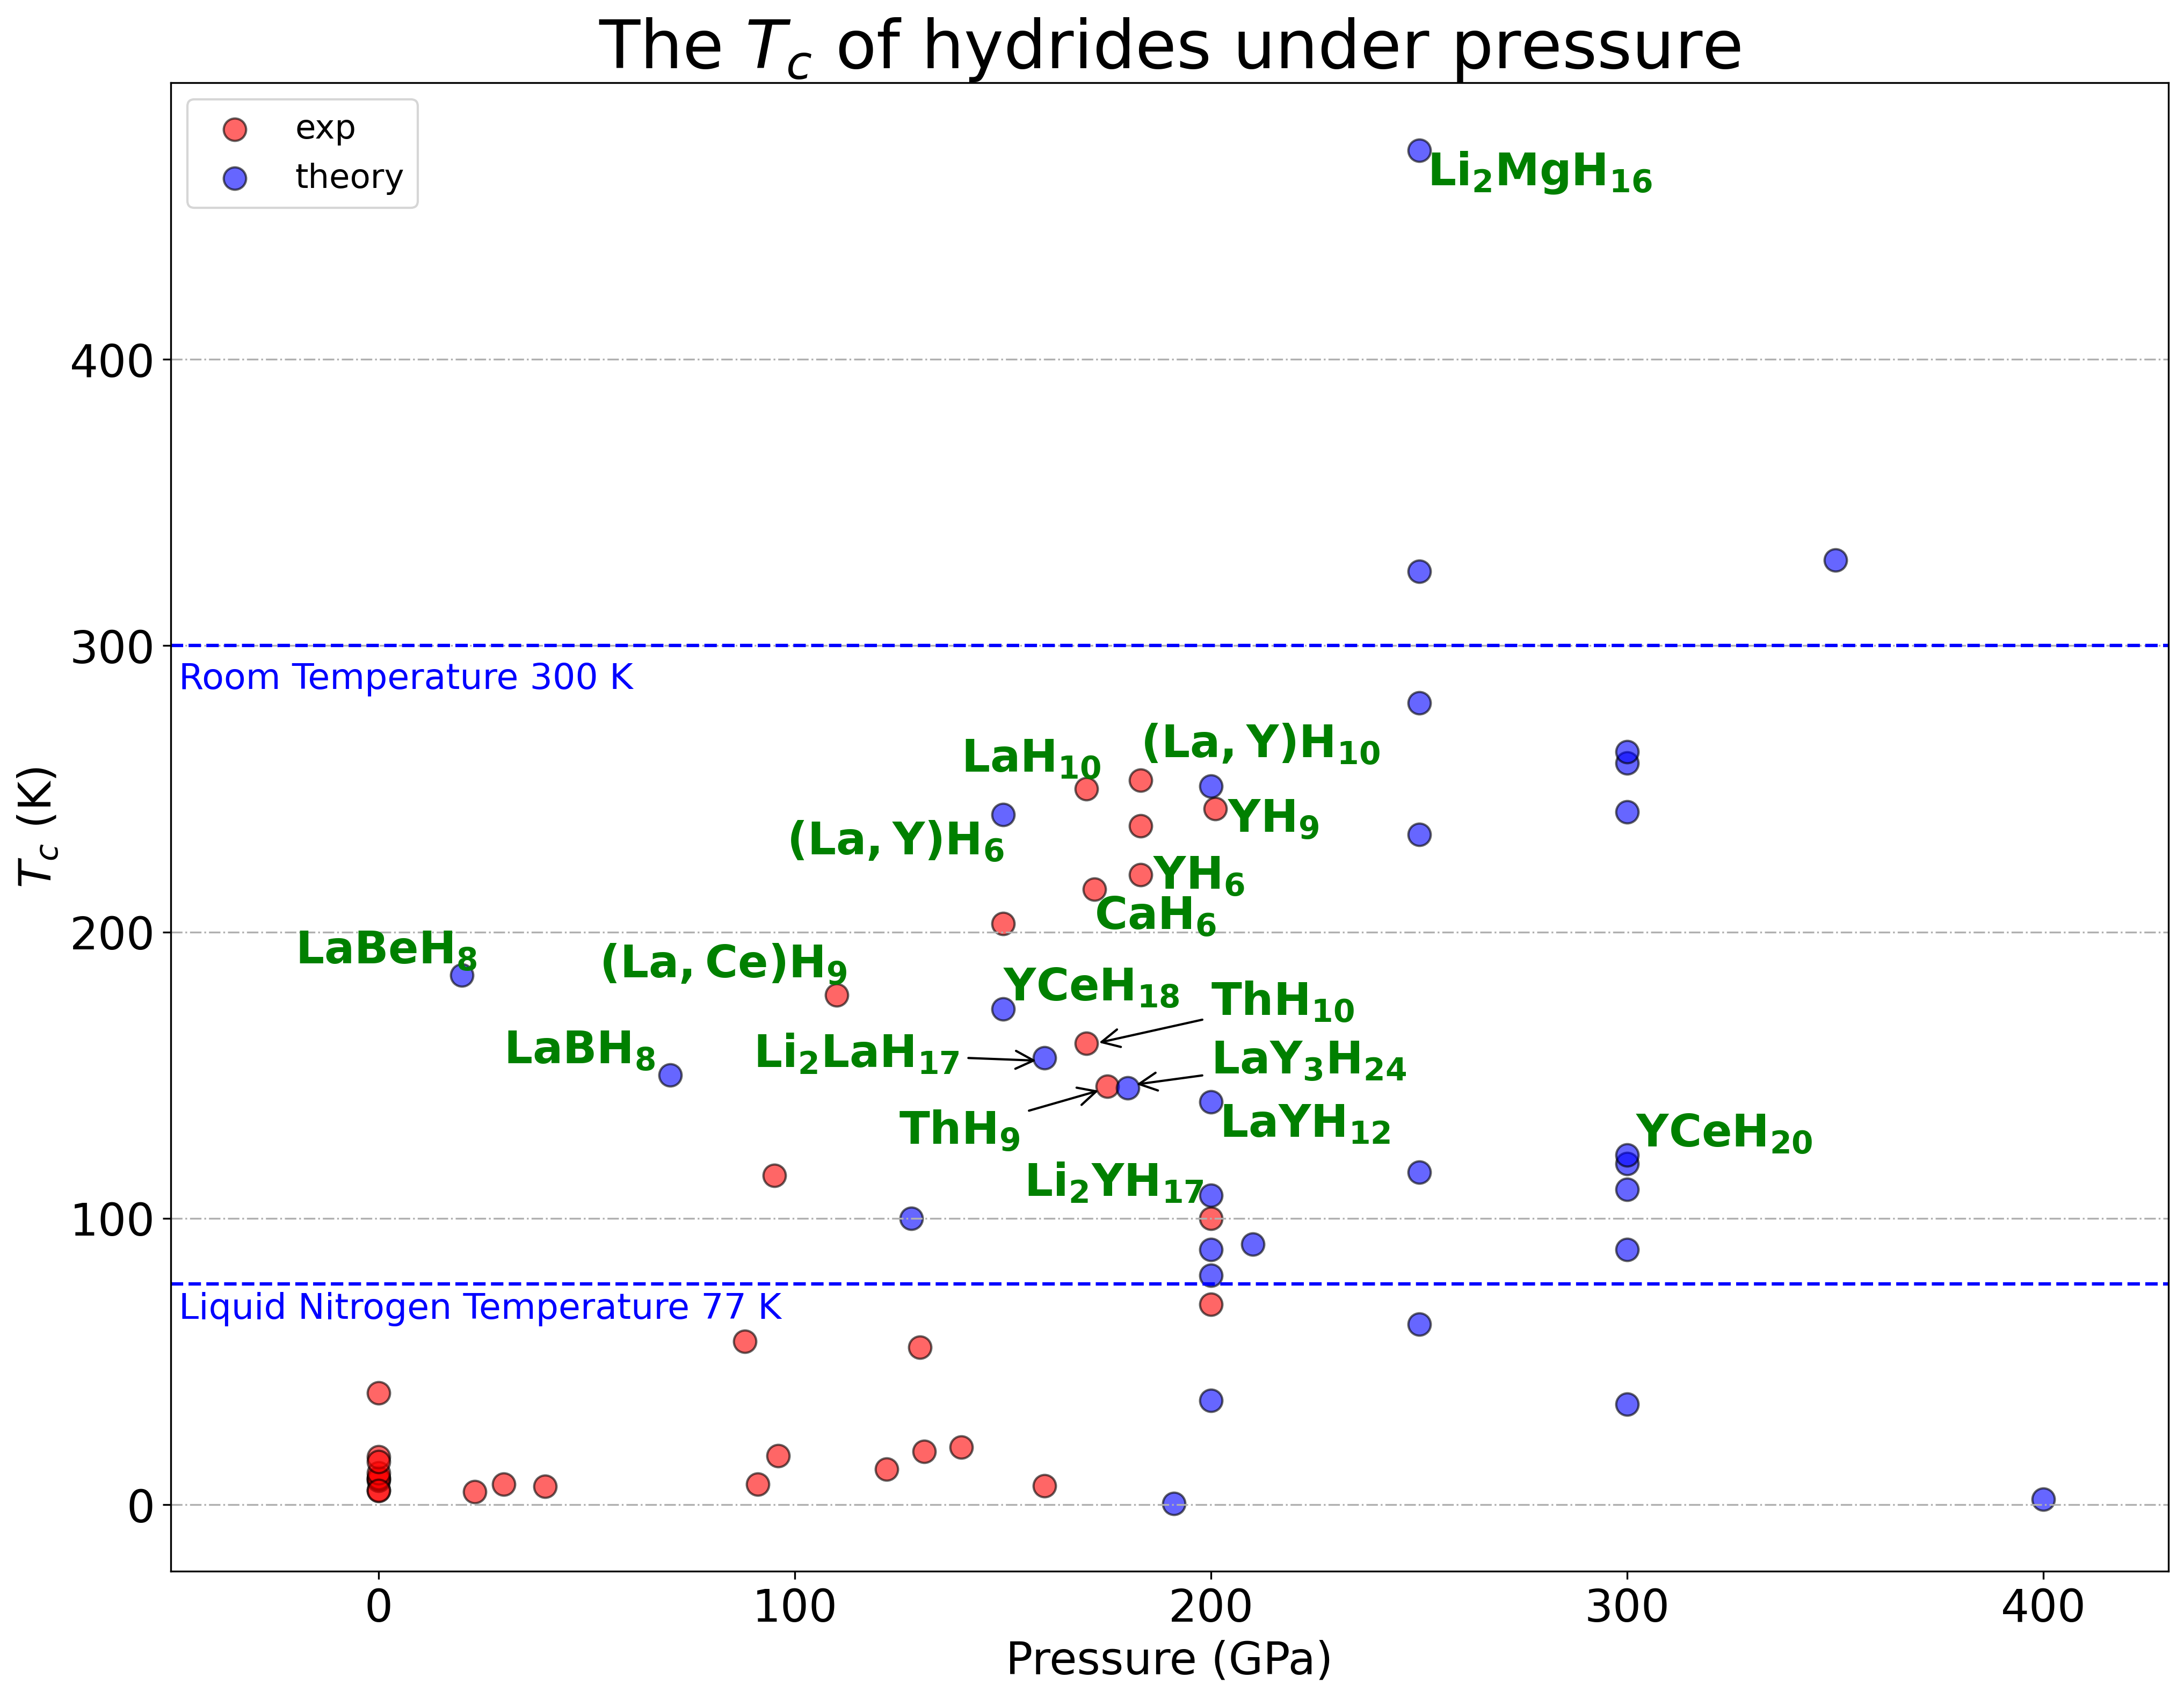

In [9]:
import numpy as np
import matplotlib.pyplot as plt

plt.rc('font',family='Times New Roman') 

fig = plt.figure(figsize=(16, 12),dpi=300)

# plt.rc('font',family='Times New Roman')

plt.xlabel("Pressure (GPa)",  fontsize=20)
plt.xlim((-50,430)) # 用于设置横坐标显示范围的函数
plt.ylabel("$T_c$ (K)",  fontsize=20)

plt.title("The $T_c$ of hydrides under pressure", fontdict={'family': 'Times New Roman', 'size': 30})
plt.tick_params(labelsize=15)
plt.grid(axis="y", linestyle='-.')

# 横坐标刻度的字体
plt.xticks(fontsize=20)
# 纵坐标刻度的字体
plt.yticks(fontsize=20)
# Experiment
exp_X = exp_h['压力(GPa)'].tolist()
exp_Y = exp_h['Tc(K)'].tolist()
exp_annotations=exp_h['化合物'].tolist()
print(len(exp_X), len(exp_Y), len(exp_annotations))

plt.scatter(exp_X, exp_Y, s=100, c='r', label='exp', alpha=0.6, edgecolors='Black')
# exp_X: x轴数据数组
# exp_Y: y轴数据数组
# s: 散点的大小, 默认值是 20, 这里设置为 100
# c: 散点的颜色, 默认是蓝色（'b'）, 这里设置为红色（'r'）
# label: 图例标签, 这里设置为 'exp'
# alpha: 散点的透明度, 取值范围是 [0, 1], 默认值是 None, 这里设置为 0.6
# edgecolors: 散点边缘的颜色, 默认是无边缘, 这里设置为黑色（'Black'）

for i, label in enumerate(exp_annotations):
    if label not in ['NbH0.69', 'Pd0.55Cu0.45H0.04', 'HfV2H']:
        if label == 'ThH9':
            plt.annotate("$\mathbf{ThH_{9}}$", xytext=(exp_X[i]-50, exp_Y[i]-20), xy=(exp_X[i]-1, exp_Y[i]-1), arrowprops=dict(edgecolor='black', arrowstyle='->', connectionstyle='arc3',), fontsize=20, color='green', weight='heavy')
        elif label == 'ThH10':
            # xy设置箭头的指向的位置
            # xytext设置箭尾固定的位置
            plt.annotate("$\mathbf{ThH_{10}}$", xytext=(exp_X[i]+30, exp_Y[i]+10), xy=(exp_X[i]+2, exp_Y[i]), arrowprops=dict(edgecolor='black', arrowstyle='->', connectionstyle='arc3',), fontsize=20, color='green', weight='heavy')
        elif label == 'YH9':
            plt.annotate("$\mathbf{YH_{9}}$", (exp_X[i]+3, exp_Y[i]-8), fontsize=20, color='green', weight='heavy')
        elif label == 'LaH10':
            plt.annotate("$\mathbf{LaH_{10}}$", (exp_X[i]-30, exp_Y[i]+6), fontsize=20, color='green')
        elif label == '(La,Ce)H9':
            plt.annotate("$\mathbf{(La,Ce)H_{9}}$", (exp_X[i]-57, exp_Y[i]+6), fontsize=20, color='green', weight='heavy')
        elif label == '(La,Y)H10':
            plt.annotate("$\mathbf{(La,Y)H_{10}}$", (exp_X[i], exp_Y[i]+8), fontsize=20, color='green', weight='heavy')
        elif label == '(La,Y)H6':
            plt.annotate("$\mathbf{(La,Y)H_{6}}$", (exp_X[i]-85, exp_Y[i]-10), fontsize=20, color='green', weight='heavy')
        elif label == 'CaH6':
            plt.annotate("$\mathbf{CaH_{6}}$", (exp_X[i], exp_Y[i]-14), fontsize=20, color='green', weight='heavy')
        elif label == 'YH6':
            plt.annotate("$\mathbf{YH_{6}}$", (exp_X[i]+3, exp_Y[i]-5), fontsize=20, color='green', weight='heavy')
        # elif label == 'NaH4C60':
            # plt.annotate(label+'(15K)', (exp_X[i]+2, exp_Y[i]+7), fontsize=13)
        # elif label == 'BaReH9':
            # plt.annotate(label, (exp_X[i]-2, exp_Y[i]-12), fontsize=13)
        # elif label == 'Li5MoH11':
            # plt.annotate(label, (exp_X[i]-10, exp_Y[i]-13), fontsize=13)
        # elif label == 'PdH':
            # plt.annotate(label+'(11K)', (exp_X[i]-35, exp_Y[i]+7), fontsize=13)
        # elif label == 'PrH9':
            # plt.annotate(label+'(9K)', (exp_X[i]-35, exp_Y[i]+0), fontsize=13)
        # elif label == 'Th4H15':
            # plt.annotate(label+'(~8K)', (exp_X[i]-47, exp_Y[i]-9), fontsize=13)
        # elif label == 'NdH9':
            # plt.annotate(label+'(5K)', (exp_X[i]-35, exp_Y[i]-14), fontsize=13)
        # elif label == 'PtH':
            # plt.annotate(label, (exp_X[i], exp_Y[i]+3), fontsize=13)
        # elif label == 'Hf4H15':
            # plt.annotate(label, (exp_X[i]-12, exp_Y[i]-10), fontsize=13)
        # elif label == 'ScH3':
            # plt.annotate(label, (exp_X[i]-8, exp_Y[i]+5), fontsize=13)
        # elif label == 'LuH3':
            # plt.annotate(label, (exp_X[i]-1, exp_Y[i]-12), fontsize=13)
        else:
            dst_type = total_hydrides[total_hydrides['化合物']==label]['类型']
            if 'clathrate' in dst_type.to_string():
                plt.annotate(label, (exp_X[i]+3, exp_Y[i]), fontsize=20, color='green', weight='heavy')
            else:
                # plt.annotate(label, (exp_X[i]+3, exp_Y[i]), fontsize=13,)
                pass



# Theory 
theory_X = theory_h['压力(GPa)'].tolist()
theory_Y = theory_h['Tc(K)'].tolist()
theory_annotations=theory_h['化合物'].tolist()
print(len(theory_X), len(theory_Y), len(theory_annotations))
print(theory_annotations)
# alpha 点的透明度
# linewidths 散点的边缘线宽
# edgecolors 散点的边缘颜色
plt.scatter(theory_X, theory_Y, s=100, c='b', label='theory', alpha=0.6, edgecolors='Black')

for i, label in enumerate(theory_annotations):
    if label not in ['xx',]:
        if label == 'Li2LaH17':
            plt.annotate("$\mathbf{Li_{2}LaH_{17}}$", xytext=(theory_X[i]-70, theory_Y[i]-3), xy=(theory_X[i]-1, theory_Y[i]-1), arrowprops=dict(facecolor='red', arrowstyle='->', mutation_scale=20, mutation_aspect=1), fontsize=20, color='green', weight='heavy')
        elif label == 'LaBH8':
            plt.annotate("$\mathbf{LaBH_{8}}$", (theory_X[i]-40, theory_Y[i]+4), fontsize=20, color='green', weight='heavy')
        elif label == 'LaBeH8':
            plt.annotate("$\mathbf{LaBeH_{8}}$", (theory_X[i]-40, theory_Y[i]+4), fontsize=20, color='green', weight='heavy')
        elif label == 'LaY3H24':
            # mutation_aspect表示箭头的宽度和高度之比，它是一个浮点数，默认值为1，表示箭头的宽度和高度相等。如果将mutation_aspect设置为小于1的值，则箭头会变得更加细长；如果将mutation_aspect设置为大于1的值，则箭头会变得更加宽
            plt.annotate("$\mathbf{LaY_{3}H_{24}}$", xytext=(theory_X[i]+20, theory_Y[i]+5), xy=(theory_X[i]+1, theory_Y[i]+1), arrowprops=dict(facecolor='red', arrowstyle='->', mutation_scale=20, mutation_aspect=1), fontsize=20, color='green', weight='heavy')
        elif label == 'Li2YH17':
            plt.annotate("$\mathbf{Li_{2}YH_{17}}$", (theory_X[i]-45, theory_Y[i]), fontsize=20, color='green', weight='heavy')
        elif label == 'YCeH20':
            plt.annotate("$\mathbf{YCeH_{20}}$", (theory_X[i]+2, theory_Y[i]+3), fontsize=20, color='green', weight='heavy')
        elif label == 'YCeH18':
            plt.annotate("$\mathbf{YCeH_{18}}$", (theory_X[i], theory_Y[i]+3), fontsize=20, color='green', weight='heavy')
        elif label == 'LaYH12':
            plt.annotate("$\mathbf{LaYH_{12}}$", (theory_X[i]+2, theory_Y[i]-12), fontsize=20, color='green', weight='heavy')
        elif label == 'Li2MgH16':
            plt.annotate("$\mathbf{Li_{2}MgH_{16}}$", (theory_X[i]+2, theory_Y[i]-12), fontsize=20, color='green', weight='heavy')
        # elif label == 'SrH10':
            # plt.annotate(label, (theory_X[i]+3, theory_Y[i]-6), fontsize=13)
        # elif label == 'AcH16':
            # plt.annotate(label, (theory_X[i]-24, theory_Y[i]-8), fontsize=13)
        # elif label == 'LaSH6':
            # plt.annotate(label, (theory_X[i]+2, theory_Y[i]+3), fontsize=13)
        # elif label == 'YSH6':
        #     plt.annotate(label, (theory_X[i]+3, theory_Y[i]-1), fontsize=13)
        # elif label == 'PSH6':
        #     plt.annotate(label, (theory_X[i]-22, theory_Y[i]), fontsize=13)
        else:
            dst_type = total_hydrides[total_hydrides['化合物']==label]['类型']
            if 'clathrate' in dst_type.to_string():
                print(label)
                # plt.annotate(label, (theory_X[i]+3, theory_Y[i]), fontsize=20, color='green', weight='heavy')
            else:
                # plt.annotate(label, (theory_X[i]+3, theory_Y[i]), fontsize=13,)
                pass



plt.plot([-50, 430], [77, 77], linestyle='dashed', c='b')
plt.text(-48, 285, 'Room Temperature 300 K', fontsize=16, color='b')
plt.plot([-50, 430], [300, 300], linestyle='dashed', c='b')
plt.text(-48, 65, 'Liquid Nitrogen Temperature 77 K', fontsize=16, color='b')

# 最终显示
plt.legend(loc='upper left', fontsize=15)
plt.show()
